# **Predicting the Survival of Titanic Passengers**

____

## Table of Contents

The steps we will go through are as follows:

* Get The Data and Explore
    Here we'll explore what inside of the dataset and based on that we'll make our first commit on it.

* Feature Analysis To Gain Insights
    First we try to find out outlier from our datasets. There're many method to dectect outlier but here we will use tukey method to detect it. Then we will do component analysis of our features.

* Feature Engineering
    Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. And here, in our datasets there are few features that we can do engineering on it. I like to choose two of them.
        Name
        Family Size

* Predictive Modeling (In Part 2)
    Here, we will use various classificatiom models and compare the results. We'll use Cross-validation for evaluating estimator performance and fine-tune the model and observe the learning curve, of best estimator and finally, will do enseble modeling of with three best predictive model.

    -Submit Predictor
    Create a CSV file and submit to Kaggle.


 ## Import libraries

In [1]:
# Data Processing and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
from collections import Counter

sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline

 ## Get Data Sets

In [2]:
# load the datasets using pandas's read_csv method
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
# load the datasets using pandas's read_csv method
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# concat these two datasets, this will come handy while processing the data
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

# separately store ID of test datasets, 
# this will be using at the end of the task to predict.
TestPassengerID = test['PassengerId']

C:\Users\AnuragMishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## Look Inside

Let's look what we've just loaded. Datasets size, shape, short description and few more.

In [4]:
# shape of the data set
train.shape # (891, 12)

(891, 12)

In [5]:
# first 5 records
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# using info method we can get quick overview of the data sets
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 we have 891 samples or entries but columns like Age, Cabin and Embarked have some missing values. We can't ignore those. However, let's generate the descriptive statistics to get the basic quantitative information about the features of our data set.

In [7]:
# Descriptive Statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Create table for missing data analysis

def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

In [9]:
# run the method
find_missing_data(train)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


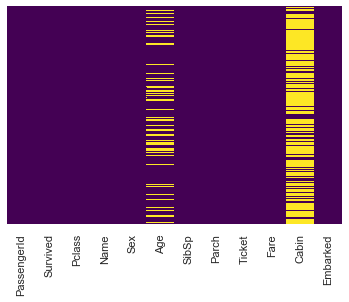

In [10]:
# create a heatmap plot to visualize the amount of missing values.

# checking only train set - visualize
sns.heatmap(train.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

* We can see that, Cabin feature has terrible amount of missing values, around 77% data are missing. 
* now let's see amount of missing values in whole datasets.

In [11]:
# missing values in whole datasets.
find_missing_data(dataset)

,Total,Percent
Cabin,1014,0.774637
Survived,418,0.319328
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000
PassengerId,0,0.000000


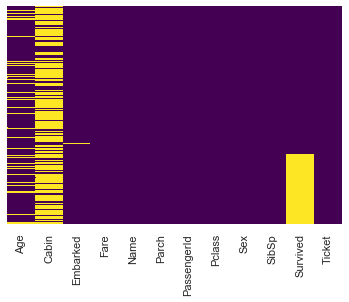

In [12]:
# checking only datasets set
sns.heatmap(dataset.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

## Feature Analysis
### Outlier Detection

There are many method to detect outlier. We will use Tukey Method to accomplish it.

In [13]:
# Outlier detection 
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
   
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

In [14]:
# Show the outliers rows
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [15]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [16]:
train.shape

(881, 12)

In [17]:
# after removing outlier, let's re-concat the data sets
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

C:\Users\AnuragMishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### Numerical Analysis

At first let's analysis the correlation of 'Survived' features with the other numerical features like 'SibSp', 'Parch', 'Age', 'Fare'.

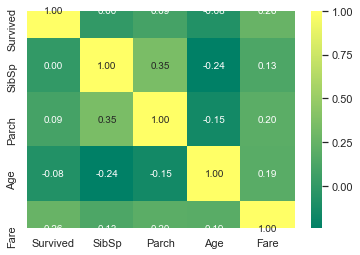

In [18]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
corr_numeric = sns.heatmap(dataset[["Survived","SibSp","Parch","Age","Fare"]].corr(),
                           annot=True, fmt = ".2f", cmap = "summer")

* Only Fare feature seems to have a significative correlation with the survival probability.
* But it doesn't make other features useless. Subpopulations in these features can be correlated with the survival. To estimate this, we need to explore in detail these features.

### Age

Let's first look the age distribution among survived and not survived passengers.

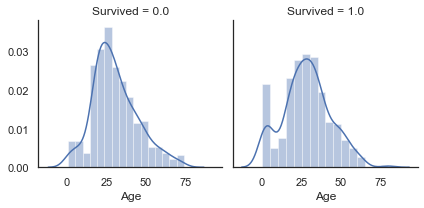

In [19]:
# Explore the Age vs Survived features
age_survived = sns.FacetGrid(dataset, col='Survived')
age_survived = age_survived.map(sns.distplot, "Age")

So, It's look like age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived. So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive. Let's look one for time.

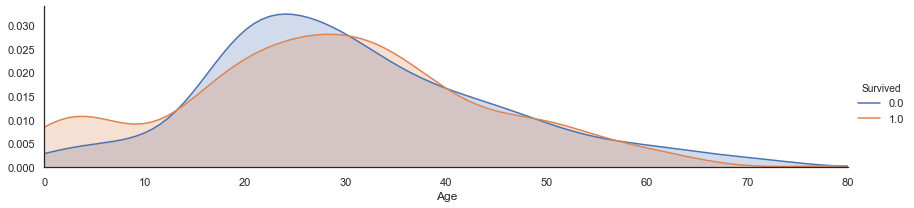

In [20]:
fig = sns.FacetGrid(dataset, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, dataset['Age'].max()))
fig.add_legend()

Again we see that aged passengers between 65-80 have less survived.

## Missing Age Value

We have seen significantly missing values in Age coloumn.  
Let's first try to find correlation between Age and Sex features.

C:\Users\AnuragMishra\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


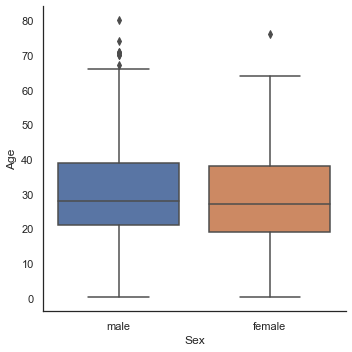

In [21]:
# visualize this using box plot
AS = sns.factorplot(y="Age", x="Sex", data = dataset, kind='box',)

Age distribution seems to be almost same in Male and Female subpopulations, so Sex is not informative to predict Age. Let's explore age and pclass distribution.

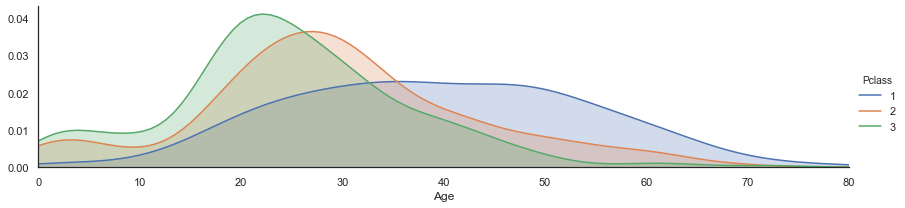

In [22]:
facet = sns.FacetGrid(dataset, hue="Pclass", aspect=4)

facet.map(sns.kdeplot,'Age',shade= True)

facet.set(xlim=(0, train['Age'].max()))

facet.add_legend()
plt.show()

we see there're more young people from class 3.  

First class passenger seems more aged than second class and third class are following. 

But we can't get any information to predict age. But let's try an another approach to visualize with the same parameter.

C:\Users\AnuragMishra\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


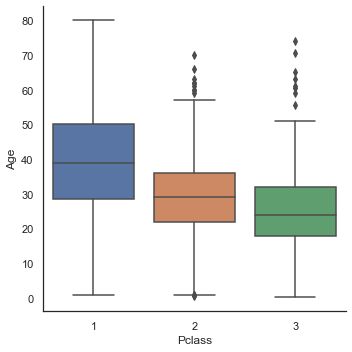

In [23]:
# using boxplot 
PA = sns.factorplot(data = dataset , x = 'Pclass' , y = 'Age', kind = 'box')

Here, we can get some information, First class passengers are older than 2nd class passengers who are also older than 3rd class passengers. We can easily visaulize that roughly 37, 29, 24 respectively are the median values of each classes. The strategy can be used to fill Age with the median age of similar rows according to Pclass.

In [24]:
# a custom function for age imputation
def AgeImpute(df):
    Age = df[0]
    Pclass = df[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2: return 29
        else: return 24
    else:
        return Age

# Age Impute
dataset['Age'] = dataset[['Age' , 'Pclass']].apply(AgeImpute, axis = 1)

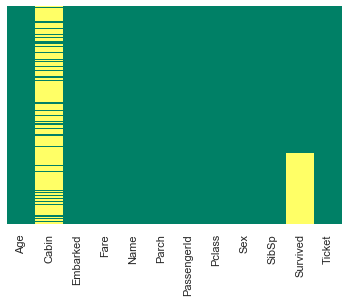

In [25]:
# age featured imputed; no missing age records
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'summer')

Fare feature missing some values, we will handle it later.

### SibSP

Now, let's look Survived and SibSp features in details.

C:\Users\AnuragMishra\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\AnuragMishra\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


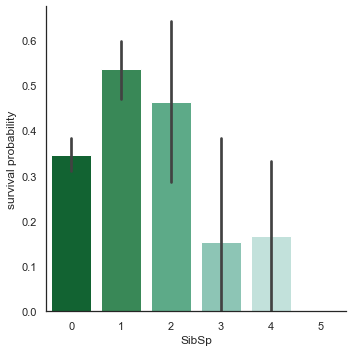

In [26]:
# Explore SibSp feature vs Survived
# We'll use factorplot to analysis

Sib_Sur = sns.factorplot(x="SibSp",y="Survived",data=train,
                   kind="bar", size = 5 , palette = "BuGn_r")

Sib_Sur = Sib_Sur.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive. Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

### Parch

Let's look Survived and Parch features in details.

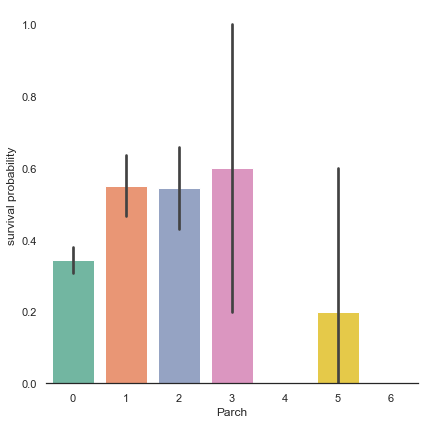

In [27]:
# Explore Parch feature vs Survived
# We'll use factorplot to analysis
Sur_Par = sns.factorplot(x="Parch",y="Survived",data=train, 
                         kind="bar", size = 6 , palette = "Set2")

Sur_Par.despine(left=True)
Sur_Par = Sur_Par.set_ylabels("survival probability")

Small families have more chance to survive, more than single.

### Fare

Let's look Survived and Fare features in details. We have seen that, Fare feature also mssing some values. Let's handle it first.

In [28]:
dataset["Fare"].isnull().sum() # 1

1

Since we have one missing value , I will to fill it with the median value.

In [29]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

## Categorical analysis

### sex

In [30]:
print(dataset['Sex'].head()) # top 5
print(' ')
print(dataset['Sex'].tail()) # last 5

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
 
1294      male
1295    female
1296      male
1297      male
1298      male
Name: Sex, dtype: object


In [31]:
# convert Sex into categorical value 0 for male and 1 for female
sex = pd.get_dummies(dataset['Sex'], drop_first = True)
dataset = pd.concat([dataset,sex], axis = 1)

# After now, we really don't need to Sex features, we can drop it.
dataset.drop(['Sex'] , axis = 1 , inplace = True)

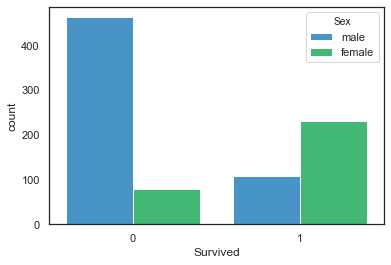

In [32]:
#using countplot to estimate amount

flatui = ["#3498db", "#2ecc71"]

sns.countplot(data = train , x = 'Survived' , hue = 'Sex',palette=flatui)

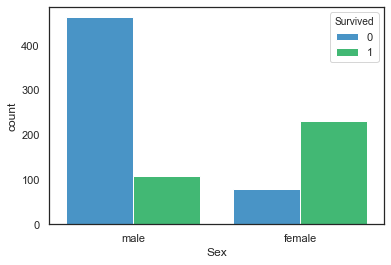

In [33]:
sns.countplot(data = train , x ='Sex'  , hue = 'Survived',palette=flatui)

In [34]:
# let's see the percentage
train[["Sex","Survived"]].groupby('Sex').mean()


,Survived
Sex,
female,0.747573
male,0.190559


It is clearly obvious that Male have less chance to survive than Female. This is heavily an important feature for our prediction task.

### Pclass

Let's explore passenger calsses feature with age feature. From this we can know, how much children, young and aged people were in different passenger class.

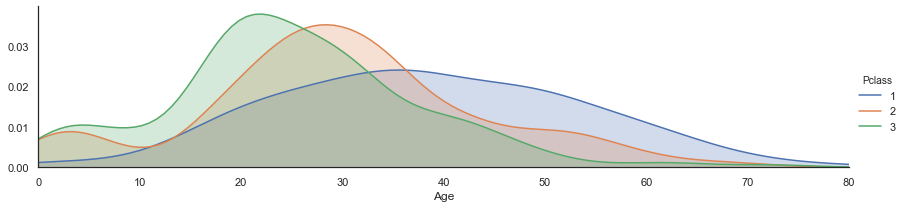

In [35]:
facet = sns.FacetGrid(train, hue="Pclass",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

So, we see there're more young people from class 3. And more aged passenger were in first class, and that indicate that they're rich. So, most of the young people were in class three.

However, let's explore the Pclass vs Survived using Sex feature. This will give more information about the survival probability of each classes according to their gender.

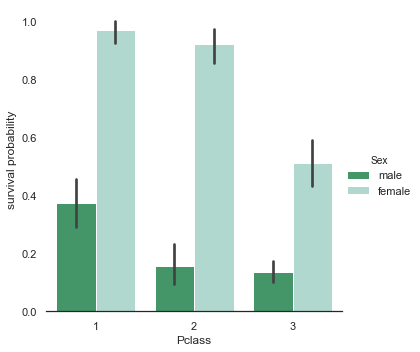

In [36]:
Survived_Pcalss = sns.factorplot(x="Pclass", y="Survived", 
                                 hue="Sex", data=train,size=5, 
                                 kind="bar", palette="BuGn_r")
Survived_Pcalss.despine(left=True)
Survived_Pcalss = Survived_Pcalss.set_ylabels("survival probability")

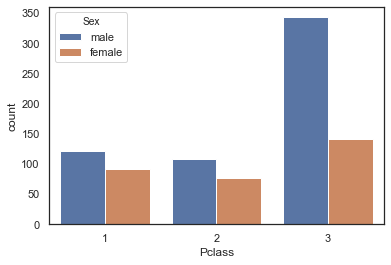

In [37]:
sns.countplot(x="Pclass", hue="Sex", data=train)


The passenger survival is not the same in the all classes. First class passengers have more chance to survive than second class and third class passengers. And Female survived more than Male in every classes.

### Embarked

Port of Embarkation , C = Cherbourg, Q = Queenstown, S = Southampton. Categorical feature that should be encoded. We can use feature mapping or make dummy vairables for it.

However, let's explore it combining Pclass and Survivied features. So that, we can get idea about the classes of passengers and also the concern embarked.

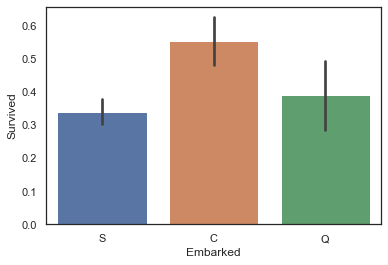

In [38]:
# 'Embarked' vs 'Survived'

sns.barplot(dataset['Embarked'], dataset['Survived']);

coming from Cherbourg people have more chance to survive. But why? That's weird. Let's compare this feature with other variables.

In [39]:
# Count
print(dataset.groupby(['Embarked'])['PassengerId'].count())

Embarked
C    270
Q    123
S    904
Name: PassengerId, dtype: int64


In [40]:
# Compare with other variables
dataset.groupby(['Embarked']).mean()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,male
Embarked,,,,,,,,
C,31.242296,62.336267,0.370370,690.655556,1.851852,0.400000,0.553571,0.581481
Q,25.963415,12.409012,0.113821,668.593496,2.894309,0.341463,0.389610,0.512195
S,28.973175,26.296450,0.409292,645.971239,2.347345,0.484513,0.339117,0.683628


* C passenger have paid more and travelling in a better class than people embarking on Q and S.
* Amount of passenger from S is larger than others. But survival probability of C have more than others.

As we've seen earlier that Embarked feature also has some missing values, so we can fill them with the most fequent value of Embarked which is S (almost 904).

In [41]:
# count missing values
print(dataset["Embarked"].isnull().sum()) # 2

2


In [42]:
# Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

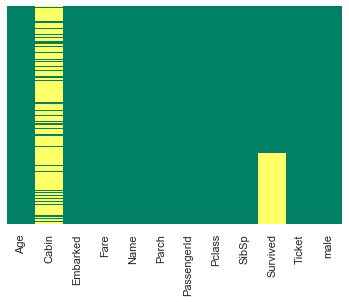

In [43]:
# let's visualize it to confirm
sns.heatmap(dataset.isnull(), yticklabels = False, 
            cbar = False, cmap = 'summer')

Now, there's no missing values in Embarked feature. Let's explore this feature a little bit more. We can viz the survival probability with the amount of classes passenger embarked on different port.

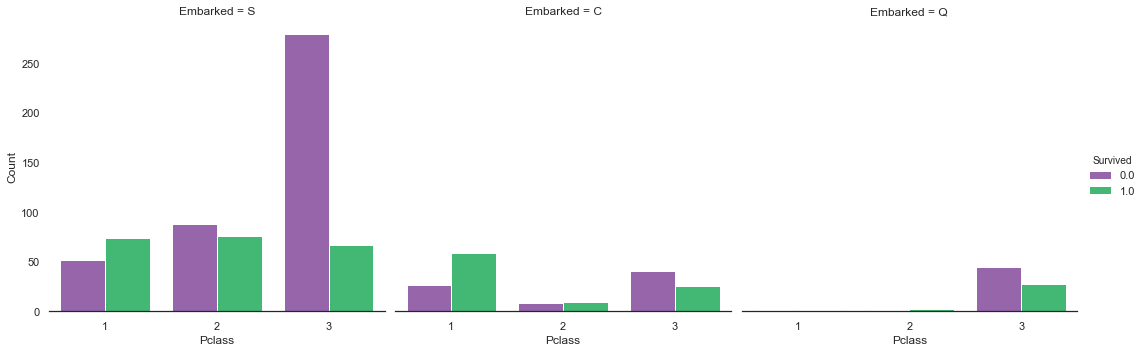

In [44]:
# Counting passenger based on Pclass and Embarked 

flatui = ["#9b59b6","#2ecc71"]

Embarked_Pc = sns.factorplot("Pclass", col="Embarked",  data=dataset,
                   size=5, kind="count", palette=flatui, hue = 'Survived')

Embarked_Pc.despine(left=True)
Embarked_Pc = Embarked_Pc.set_ylabels("Count")

* the third class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q)
* Cherbourg passengers are mostly in first class. 
* From this,we can also get idea about the economic condition of these region on that time.

In [45]:
# create dummy variable
embarked = pd.get_dummies(dataset['Embarked'], drop_first = True)
dataset = pd.concat([dataset,embarked], axis = 1)

# after now, we don't need Embarked coloumn anymore, so we can drop it.
dataset.drop(['Embarked'] , axis = 1 , inplace = True)

## Feature Analysis

we've many messy features like Name, Ticket and Cabin. We can do feature engineering to each of them and find out some meaningfull insight. But, I like to work on only Name variables. Ticket is, I think not too much important for prediction task and again almost 77% data missing in Cabin variables.

In [46]:
dataset.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,male,Q,S
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,A/5 21171,1,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,0,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,STON/O2. 3101282,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,0,0,1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,373450,1,0,1


Feature engineering is the art of converting raw data into useful features. There are several feature engineering techniques that you can apply. Some techniques are -

    Box-Cox transformations
    Polynomials generation through non-linear expansions


### Name

We can assume that people's title influences how they are treated. In our case, we have several titles (like Mr, Mrs, Miss, Master etc ), but only some of them are shared by a significant number of people. Accordingly, it would be interesting if we could group some of the titles and simplify our analysis.

In [47]:
dataset['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [48]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]


In [49]:
#add dataset_title to the main dataset named 'Title'
dataset["Title"] = pd.Series(dataset_title)

In [50]:
#count
dataset["Title"].value_counts()


Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Dona              1
Sir               1
the Countess      1
Capt              1
Lady              1
Don               1
Mme               1
Jonkheer          1
Name: Title, dtype: int64

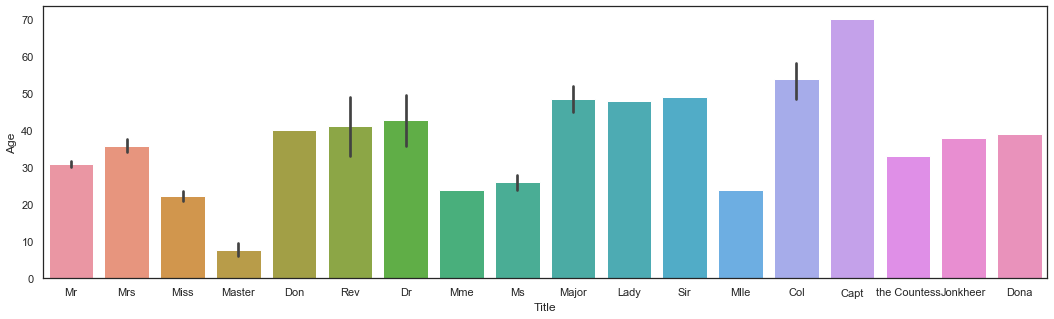

In [51]:
#Plot bar plot (titles and Age)
plt.figure(figsize=(18,5))
sns.barplot(x=dataset['Title'], y = dataset['Age'])

In [52]:
# Means per title
print(dataset.groupby('Title')['Age'].mean())

Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              42.750000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           7.643000
Miss            22.261137
Mlle            24.000000
Mme             24.000000
Mr              30.926295
Mrs             35.898477
Ms              26.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


In [53]:
#There is 18 titles in the dataset and most of them are very uncommon so we like to group them in 4 categories.


# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess',
                                             'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Jonkheer',
                                             'Dona'], 'Rare')

dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 ,
                                         "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, 
                                         "Rare":3})

dataset["Title"] = dataset["Title"].astype(int)

# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

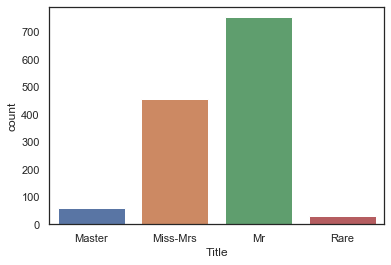

In [54]:
# viz counts the title coloumn
sns.countplot(dataset["Title"]).set_xticklabels(["Master","Miss-Mrs","Mr","Rare"]);

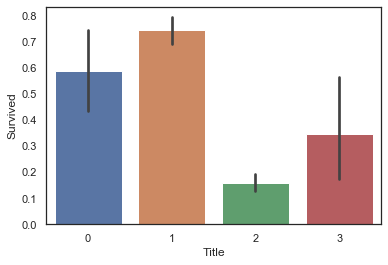

In [55]:
# Let's see, based on title what's the survival probability
sns.barplot(x='Title', y='Survived', data=dataset);

* People with the title 'Mr' survived less than people with any other title.
* Titles with a survival rate higher than 70% are those that correspond to female (Miss-Mrs)

* Our new category, 'Rare', should be more discretized. As we can see by the error bar (black line), there is a significant uncertainty around the mean value. Probably, one of the problems is that we are mixing male and female titles in the 'Rare' category. We should proceed with a more detailed analysis to sort this out. Also, the category 'Master' seems to have a similar problem. For now, we will not make any changes, but we will keep these two situations in our mind for future improvement of our data set.

From now on, there's no Name features and have Title feature to represent it.

In [56]:
# viz top 5
dataset.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,male,Q,S,Title
0,22.0,NaN,7.2500,0,1,3,1,0.0,A/5 21171,1,0,1,2
1,38.0,C85,71.2833,0,2,1,1,1.0,PC 17599,0,0,0,1
2,26.0,NaN,7.9250,0,3,3,0,1.0,STON/O2. 3101282,0,0,1,1
3,35.0,C123,53.1000,0,4,1,1,1.0,113803,0,0,1,1
4,35.0,NaN,8.0500,0,5,3,0,0.0,373450,1,0,1,2


## Family size

I like to create a Famize feature which is the sum of SibSp , Parch.

In [57]:
# Create a family size descriptor from SibSp and Parch
dataset["Famize"] = dataset["SibSp"] + dataset["Parch"] + 1

In [58]:
# Drop SibSp and Parch variables
dataset.drop(labels = ["SibSp",'Parch'], axis = 1, inplace = True)


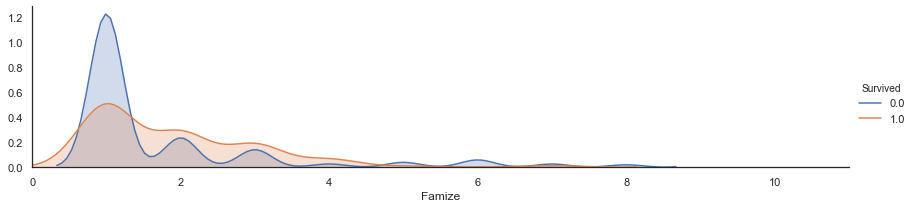

In [59]:
# Viz the survival probabily of Famize feature

facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Famize',shade= True)
facet.set(xlim=(0, dataset['Famize'].max()))
facet.add_legend()
plt.xlim(0);

Survival probability is worst for large families.

### Cabin & Ticket

Now, Cabin feature has a huge data missing. So, I like to drop it anyway. Moreover, we also can't get to much information by Ticket feature for prediction task.

In [60]:
# drop some useless features
dataset.drop(labels = ["Ticket",'Cabin','PassengerId'], axis = 1, 
             inplace = True)

____

# Predictive Modeling

Here, we split our datasets according to the previous amounts and make test and train set. To avoid overfitting event we can create validation set but that's not effective. So, we use K-Fold approaches and use StratifiedKFold to split the train datasets into 10 (by default).

In [61]:
# Separate train dataset and test dataset

train = dataset[:len(train)]
test = dataset[len(train):]
test.drop(labels=["Survived"],axis = 1,inplace = True)


C:\Users\AnuragMishra\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
## Separate train features and label 
Y_train = train["Survived"].astype(int)
X_train = train.drop(labels = ["Survived"],axis = 1)

In [63]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)

## Classifier

I compare 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

1. KNN
2. AdaBoost
3. Decision Tree
4. Random Forest
5. Extra Trees
6. Support Vector Machine
7. Gradient Boosting
8. Logistic regression
9. Linear Discriminant Analysis
10. Multiple layer perceprton


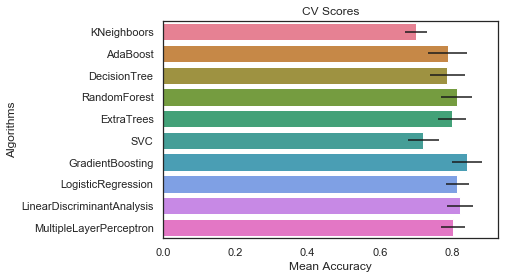

In [64]:
# Modeling step Test differents algorithms 
random_state = 2

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, Y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

### Let's explore following models separately:

* GBC Classifier
* Linear Discriminant Analysis
* Logistic Regression
* Random Forest Classifer
* Gaussian Naive Bayes
* Support Vectore Machine

Let's start with Gradient Boosting Classifier.

In [65]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.83146067 0.82954545 0.76136364 0.89772727 0.90909091 0.875
 0.84090909 0.79545455 0.84090909 0.82954545]


84.11

In [66]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.84269663 0.82954545 0.76136364 0.88636364 0.81818182 0.80681818
 0.79545455 0.78409091 0.86363636 0.84090909]


82.29

In [67]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.83146067 0.81818182 0.76136364 0.875      0.81818182 0.77272727
 0.79545455 0.79545455 0.84090909 0.84090909]


81.5

Random Forest is typically an ensemble of decesion tree classifer. It should perform better than all. Let's see.

In [68]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.75280899 0.80681818 0.71590909 0.84090909 0.85227273 0.79545455
 0.82954545 0.72727273 0.79545455 0.85227273]


79.69

Gaussian NB performs pretty well on binary classification.

In [69]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.78651685 0.81818182 0.75       0.86363636 0.77272727 0.79545455
 0.80681818 0.78409091 0.85227273 0.84090909]


80.71

Support Vector Machine or SVM is pretty much promsing ML algorithm. It should perform well also.

In [70]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.69662921 0.65909091 0.64772727 0.72727273 0.76136364 0.70454545
 0.76136364 0.73863636 0.72727273 0.78409091]


72.08

____

# Hyperparameter Tuning

I decided to choose this promising models of GradientBoosting, Linear Discriminant Analysis, RandomForest, Logistic Regression and SVM for the ensemble modeling. So, now we need to fine-tune them.

One way to do that would be to fiddle with the hyperparameters manually until we find a great combination of hyperparamerter values. This would be very tedious work, and we may not have time to explore many combination. Instead we should get Scikit-Learn's GridSearchCV to search for us. All we need to do is tell it which hyperparameters we want it to experiment with, and what values to try out and it will evaluate all the possible combination of hyperparameter values, using cross-validation.

Here we perform grid search optimization for GradientBoosting, RandomForest, Linear Discriminant Analysis, Logistic Regression and SVC classifier.

## Hyper-Parameter Tuning on GBC

In [72]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   28.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   53.5s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:  2.2min finished


0.8342792281498297

## Hyper-Parameter Tuning on RFC

In [73]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   54.0s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.6min finished


0.8410896708286039

### Hyper-Parameter Tuning on LR

In [74]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 416 tasks      | elapsed:    1.6s


[LibLinear]

[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:    7.4s finished


0.8240635641316686

### Hyper-Parameter Tuning on LDA

In [78]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.1s finished


0.8229284903518729

### Hyper-Parameter Tuning on SVC

In [79]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   39.8s finished


0.8161180476730987

## Plot Learning Curves
Diagnose Bias and Variance to Reduce Error

### Plot Learning Curves
###### Diagnose Bias and Variance to Reduce Error

Learning curves are a good way to see the overfitting and underfitting effect on the training set and the effect of the training size on the accuracy. Learning curves plots the model's performance on the training set and the validation set as a function of training set size. To generate the plots, we simply train the model several times on different sized subsets of the training sets. In a nutshell, a learning curves shows how error changes as the training set size increases.
If a models perform well on the training data but generalizes poorly according to the cross-validation metrics, the model is called overfitting. And again if it performs poorly on both, the model is called underfitting.

When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error will be initially quite big.

* Underfitting: If model is underfitting the training data, adding more training example will not help. We need to use more complex model or come up with better features.

* Overfitting: One way to improve the overfitting model is to feed it more training data until the validation error reaches the training error.

Resource: Learning Curves for Machine Learning

##### Bias-Variance Trade-Off

A model's generalization error can be expressed as the sum of three very different errors.

    Bias
    Variance
    Irreducible Error

##### Bias Error in Learning Curve
This part of generalization error is due to the wrong assumption, such as assuming that, the data is linear when it is actually quadratic.

    A high bias model is most likely to underfit the training data

###### Variance Error in Learning Curve
This part of generalization is due to the model is excessive sensitivity to small variations in the training data.

    A high variance model is most likely to overfit the training data

###### Irreducible Error in Learning Curve
This is due to the noisiness of the data itself. This is not concern now, because we already clean the data sets

Increasing a model's complexity will typically increases its variance and reduce its bias. Conversly, reducing a model's complexity increases its bias and reduces its variance.

Now, we'll define a learning curve ploting function where x and y axies will be traning set size and scores (not errors) gradually. So the higher the score, the better the performance of the model.

In [81]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

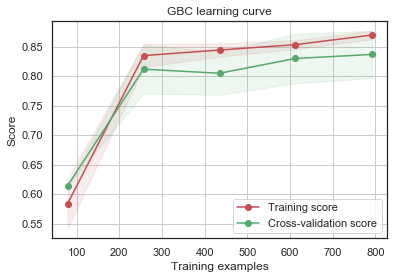

In [82]:
# Gradient boosting - Learning Curve 
plot_learning_curve(estimator = gsGBC.best_estimator_,title = "GBC learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

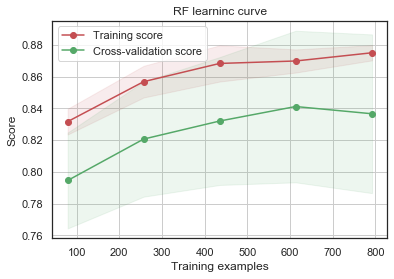

In [83]:
# Random Forest - Learning Curve
plot_learning_curve(estimator = gsRFC.best_estimator_ ,title = "RF learninc curve",
                    X = X_train, y = Y_train, cv = K_fold);

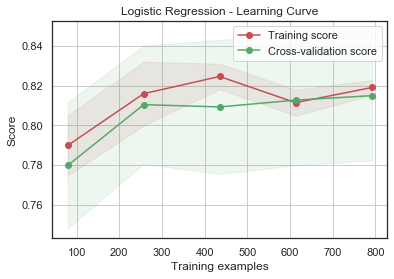

In [84]:
# Logistic Regression - Learning Curve    gsLRM.best_estimator_
plot_learning_curve(estimator = Log_Model ,title = "Logistic Regression - Learning Curve",
                    X = X_train, y = Y_train, cv = K_fold);

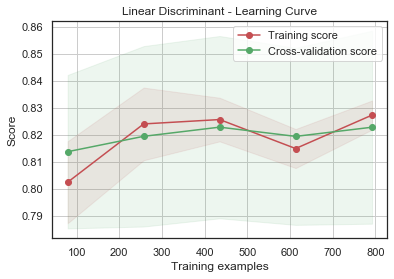

In [85]:
# Linear Discriminant Analysis - Learning Curve
plot_learning_curve(estimator = gsLDA.best_estimator_ ,title = "Linear Discriminant - Learning Curve",
                    X = X_train, y = Y_train, cv = K_fold);

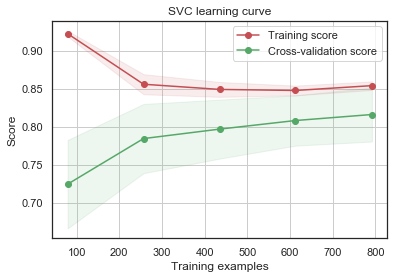

In [86]:
# Support Vector Machine - Learning Curve
plot_learning_curve(estimator = gsSVMC.best_estimator_,title = "SVC learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

* SVC seem to better generalize the prediction since the training and cross-validation curves are close together. And again Random Forest and GradientBoosting classifiers tend to overfit the training set. One way to improve the overfitting model is to feed it more training data until the validation error reaches the training error.

____

## Ensemble modeling

The another way to fine-tune our system is to try to combine the models that perform best. The goup will often perform better than the best individual model, especially if the individual models make very different types of errors.

Building a model on top of many other models are called Ensemble Learning. And it is often a great way to push ML algorithm even further.

I use voting classifier to combine the predictions coming from the 2 classifiers. I preferred to pass the argument soft to the voting parameter to take into account the probability of each vote.

In [87]:
#about 84%
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best)],
                           voting='soft', n_jobs = 4)


VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))


[0.80898876 0.85227273 0.73863636 0.90909091 0.93181818 0.85227273
 0.86363636 0.78409091 0.875      0.85227273]
84.68


 ### Submit Predictor

In [88]:
Predictive_Model = pd.DataFrame({
        "PassengerId": TestPassengerID,
        "Survived": VotingPredictor.predict(test)})

Predictive_Model.to_csv('titanic_model.csv', index=False)